In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
pd.set_option("display.max_rows", 500)

In [2]:
import pandas as pd
data=pd.read_csv('Company Stock and Investment.csv')
data.head()

,Date,Oil Investments,Gold Investments,Comp Stock,Other sharesInvestments
0,31-12-2009,0.025417,0.000150,0.017354,0.006848
1,04-01-2010,0.026830,0.001097,0.015565,-0.004609
2,05-01-2010,0.002699,0.001560,0.001729,0.005900
3,06-01-2010,0.021688,0.006009,-0.015906,-0.018116
4,07-01-2010,-0.006256,0.000221,-0.001849,-0.017013


In [3]:
cols=['date', 'oil', 'gold', 'comp', 'other']
data.columns=cols
data.head()

,date,oil,gold,comp,other
0,31-12-2009,0.025417,0.000150,0.017354,0.006848
1,04-01-2010,0.026830,0.001097,0.015565,-0.004609
2,05-01-2010,0.002699,0.001560,0.001729,0.005900
3,06-01-2010,0.021688,0.006009,-0.015906,-0.018116
4,07-01-2010,-0.006256,0.000221,-0.001849,-0.017013


# Data Exploration process!

In [4]:
data.shape

(1984, 5)

In [5]:
data.dtypes

date      object
oil      float64
gold     float64
comp     float64
other    float64
dtype: object

In [6]:
data['date']=pd.to_datetime(data['date'])

In [7]:
data.dtypes

date     datetime64[ns]
oil             float64
gold            float64
comp            float64
other           float64
dtype: object

In [8]:
data.head()

,date,oil,gold,comp,other
0,2009-12-31,0.025417,0.000150,0.017354,0.006848
1,2010-04-01,0.026830,0.001097,0.015565,-0.004609
2,2010-05-01,0.002699,0.001560,0.001729,0.005900
3,2010-06-01,0.021688,0.006009,-0.015906,-0.018116
4,2010-07-01,-0.006256,0.000221,-0.001849,-0.017013


In [9]:
data.isnull().sum()

date     0
oil      0
gold     0
comp     0
other    0
dtype: int64

In [10]:
data['year']=pd.DatetimeIndex(data['date']).year

In [11]:
data.head()

,date,oil,gold,comp,other,year
0,2009-12-31,0.025417,0.000150,0.017354,0.006848,2009
1,2010-04-01,0.026830,0.001097,0.015565,-0.004609,2010
2,2010-05-01,0.002699,0.001560,0.001729,0.005900,2010
3,2010-06-01,0.021688,0.006009,-0.015906,-0.018116,2010
4,2010-07-01,-0.006256,0.000221,-0.001849,-0.017013,2010


In [12]:
data['year'].value_counts()

2016    252
2015    252
2014    252
2013    252
2011    252
2010    252
2012    250
2017    221
2009      1
Name: year, dtype: int64

In [13]:
data.sort_values(by='date', inplace=True)

In [14]:
data.set_index(['date'], inplace=True)

In [15]:
data.head()

,oil,gold,comp,other,year
date,,,,,
2009-12-31,0.025417,0.000150,0.017354,0.006848,2009
2010-01-02,0.021414,0.007418,0.013902,-0.052149,2010
2010-01-03,-0.012669,0.005188,0.021357,0.051858,2010
2010-01-04,0.012942,0.007172,0.004128,-0.029167,2010
2010-01-06,-0.017568,0.016770,0.015377,-0.017695,2010


# OIL investmet

In [16]:
oil=data.iloc[:,[0,4]]
oil.head()

,oil,year
date,,
2009-12-31,0.025417,2009
2010-01-02,0.021414,2010
2010-01-03,-0.012669,2010
2010-01-04,0.012942,2010
2010-01-06,-0.017568,2010


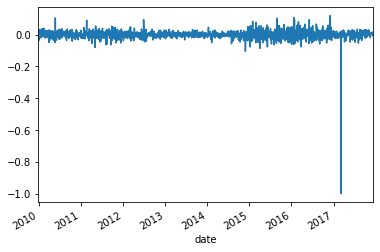

In [17]:
oil['oil'].plot()

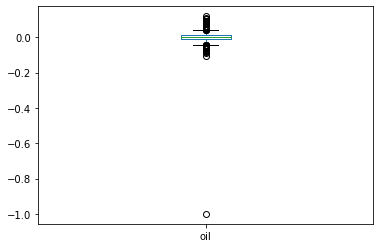

In [18]:
oil['oil'].plot.box()

In [19]:
# There may be an outlier
oil[oil['oil']<=-0.2].index

DatetimeIndex(['2017-03-07'], dtype='datetime64[ns]', name='date', freq=None)

In [20]:
# Lets remove this and the entry for 2009
oil.drop(pd.DatetimeIndex(['2009-12-31']), inplace=True)
oil.drop(pd.DatetimeIndex(['2017-03-07']), inplace=True)

In [21]:
oil.shape

(1982, 2)

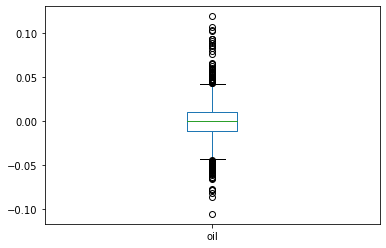

In [22]:
oil['oil'].plot.box()

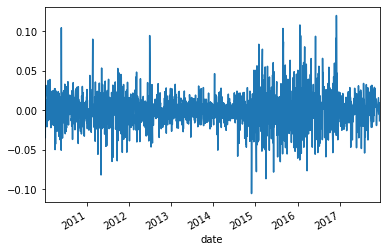

In [23]:
oil['oil'].plot()

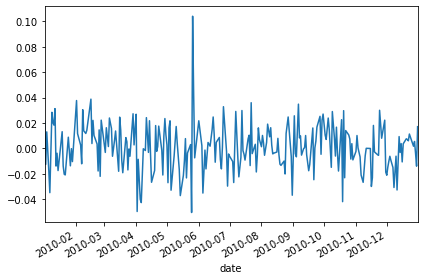

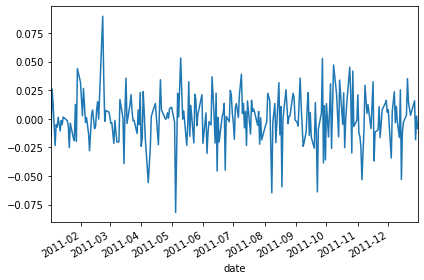

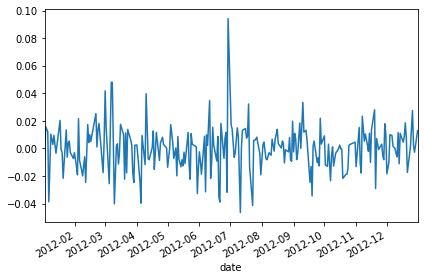

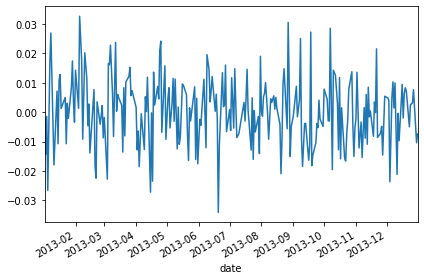

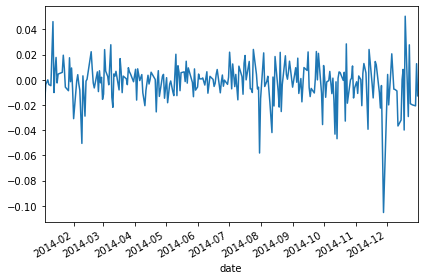

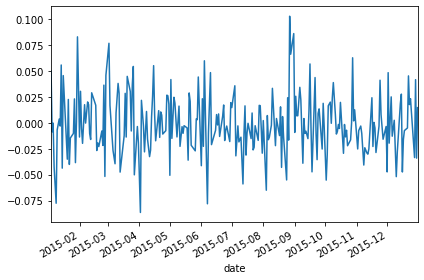

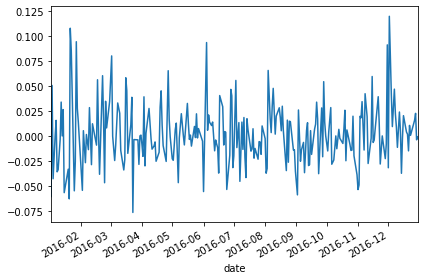

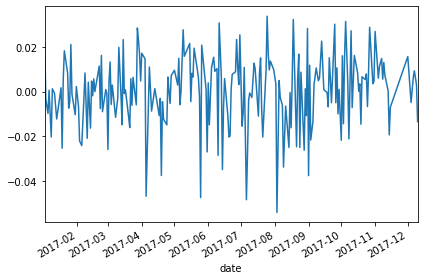

In [24]:
for i in range(2010,2018):
    plt.subplots()
    oil[oil['year']==i]['oil'].plot()
    plt.tight_layout()
    plt.show()

In [25]:
from statsmodels.tsa.stattools import adfuller
def adfuller_test(oil):
    result=adfuller(oil)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data  is stationary")
    else:
        print("weak evidence against null hypothesis, time series is non-stationary ")
        
adfuller_test(oil['oil'])

ADF Test Statistic : -45.74565887012969
p-value : 0.0
#Lags Used : 0
Number of Observations Used : 1981
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data  is stationary


In [26]:
# Here, the number of lags used is 0

<Figure size 1440x360 with 0 Axes>

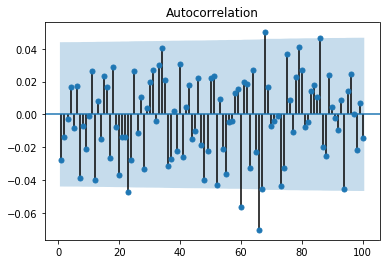

In [29]:
plt.figure(figsize=(20,5))
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(oil['oil'], zero=False, lags=100)
plt.show()

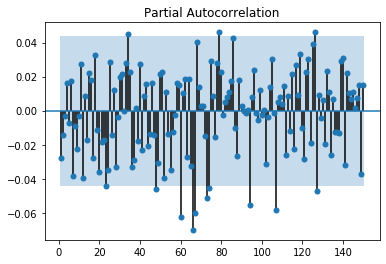

In [30]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(oil['oil'], zero=False, lags=150)
plt.show()

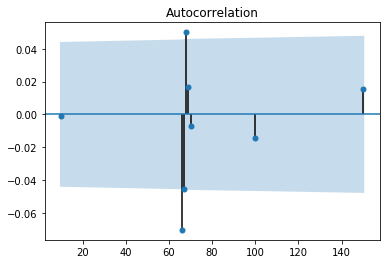

In [32]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_acf(oil['oil'], zero=False, lags=[10,66,67,68,69,70,100,150])
plt.show()

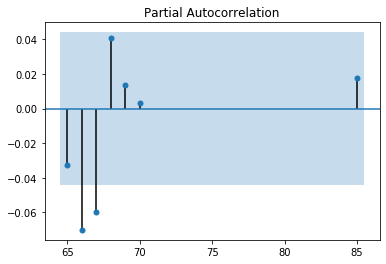

In [33]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(oil['oil'], zero=False, lags=[65,66,67,68,69,70,85])
plt.show()

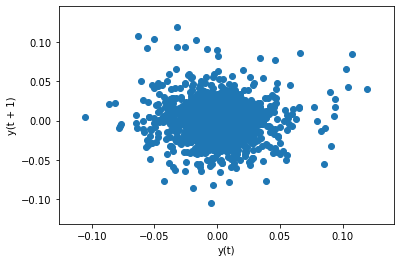

In [34]:
from pandas.plotting import lag_plot
lag_plot(oil['oil'])
plt.show()

In [35]:
# lets build a AR model with p=66

In [36]:
# lets divide data into train test split
oil['year'].value_counts()

2016    252
2015    252
2014    252
2013    252
2011    252
2010    252
2012    250
2017    220
Name: year, dtype: int64

In [37]:
# Keep the data of 2017 in test and rest in train
oil[oil['year']==2016].tail()

,oil,year
date,,
2016-12-23,0.000577,2016
2016-12-27,0.015574,2016
2016-12-28,0.022529,2016
2016-12-29,-0.003888,2016
2016-12-30,-0.000929,2016


In [38]:
train=oil.loc[:'2016-12-30',:]
train.shape

(1762, 2)

In [39]:
test=oil.loc['2017-01-02':,:]
test.shape

(220, 2)

In [40]:
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error
from math import sqrt
model = AutoReg(train['oil'], lags=66)
model_fit = model.fit()

In [42]:
# Lets make the predictions and compare the model
predictions=model_fit.predict(start=1762, end=1981,dynamic=True)
pred_list=predictions.values

In [35]:
test['preds']=pred_list

In [36]:
test.head()

,oil,year,preds
date,,,
2017-01-02,0.021801,2017,-0.000128
2017-01-03,-0.003333,2017,0.005307
2017-01-05,-0.009734,2017,-0.004541
2017-01-06,0.000621,2017,-0.012905
2017-01-08,-0.020315,2017,0.004730


In [37]:
# calculate the rmse
test['error']=(test['oil']-test['preds'])**2
rmse=sqrt(test['error'].sum())
print(rmse)

0.23976446709806024


In [292]:
# Lets try to model error with different lags
for i in range(1,66,4):
    model = AutoReg(train['oil'], lags=i)
    model_fit = model.fit()
    
    predictions=model_fit.predict(start=1762, end=1981,dynamic=True)
    pred_list=predictions.values
    
    test['preds']=pred_list
    
    test['error']=(test['oil']-test['preds'])**2
    rmse=sqrt(test['error'].sum())
    print(i, "  ", rmse)

1    0.23465926004905924
5    0.2346497114758039
9    0.23461071648352452
13    0.234491343007091
17    0.23442351881988352
21    0.23444611948985272
25    0.2343809633527164
29    0.23482884512781171
33    0.23521209732047332
37    0.2351978609917556
41    0.23561566664352496
45    0.23663114212710545
49    0.23743074942574025
53    0.23912447496694939
57    0.23895130345554438
61    0.24028764554428203
65    0.23989791994655266


In [44]:
for i in range(5,22):
    model = AutoReg(train['oil'], lags=i)
    model_fit = model.fit()
    
    predictions=model_fit.predict(start=1762, end=1981,dynamic=True)
    pred_list=predictions.values
    
    test['preds']=pred_list
    
    test['error']=(test['oil']-test['preds'])**2
    rmse=sqrt(test['error'].sum())
    print(i, "  ", rmse)

5    0.2346497114758039
6    0.23466015810640248
7    0.23459723474527877
8    0.23458856938446265
9    0.23461071648352452
10    0.23462253428102875
11    0.23460813221614585
12    0.234457354059457
13    0.234491343007091
14    0.2345382562728769
15    0.23451737038744153
16    0.23447610087679724
17    0.23442351881988352
18    0.23444777533779887
19    0.2344340101301365
20    0.23434880021525425
21    0.23444611948985272


In [45]:
# Lags=17, 12 are giving least errors

In [294]:
# lets keep lags=66 only
model = AutoReg(train['oil'], lags=66)
model_fit = model.fit()
    
predictions=model_fit.predict(start=1762, end=1981,dynamic=True)
pred_list=predictions.values
    
test['preds']=pred_list
    
test['error']=(test['oil']-test['preds'])**2
rmse=sqrt(test['error'].sum())
print(rmse)

0.23976446709806024


No handles with labels found to put in legend.


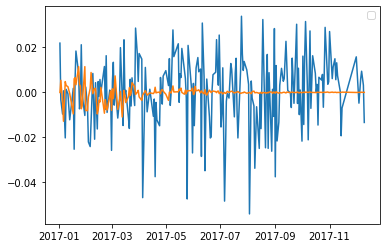

In [43]:
# Lets plot it
plt.plot(test['oil'])
plt.plot(test['preds'])
plt.legend()
plt.show()

In [297]:
# Lets build an MA(q) model
from statsmodels.tsa.arima.model import ARIMA
for i in range(1,62,10):
    model=ARIMA(train['oil'],order=(0,0,i)) # this order is p d q(0 or 1) 
    model_fit = model.fit()
    
    predictions=model_fit.predict(start=1762, end=1981,dynamic=True)
    pred_list=predictions.values
    
    test['preds']=pred_list
    
    test['error']=(test['oil']-test['preds'])**2
    rmse=sqrt(test['error'].sum())
    print(i, "  ", rmse)

1    0.2346536904609404
11    0.2345480584812434
21    0.23509512093953583
31    0.23632841853641742
41    0.2376476958868677
51    0.23950890133665484
61    0.24108694137387005


In [298]:
model=ARIMA(train['oil'],order=(0,0,66)) # this order is p d q(0 or 1) 
model_fit = model.fit()
    
predictions=model_fit.predict(start=1762, end=1981,dynamic=True)
pred_list=predictions.values
    
test['preds']=pred_list
    
test['error']=(test['oil']-test['preds'])**2
rmse=sqrt(test['error'].sum())
print(rmse)

0.2409063144384496


In [46]:
# Lets apply some machine learning models instead of using statistical models

In [47]:
# We have learnt that error is least with lag=12 or 17
# so, lets use a window size of 12

In [48]:
def univariate_data(dataset, start_index, end_index, history_size, target_size):
    data = []
    labels = []

    start_index = start_index + history_size
    if end_index is None:
        end_index = len(dataset) - target_size

    for i in range(start_index, end_index):
        indices = range(i-history_size, i)
        # Reshape data from (history_size,) to (history_size, 1)
        data.append(dataset[indices])
        labels.append(dataset[i+target_size])
    return np.array(data), np.array(labels)

In [49]:
univariate_past_history = 12
univariate_future_target = 0

x_train_oil, y_train_oil = univariate_data(oil['oil'].values, 0, 1762,
                                           univariate_past_history,
                                           univariate_future_target)
x_val_oil, y_val_oil = univariate_data(oil['oil'].values, 1762, None,
                                       univariate_past_history,
                                       univariate_future_target)

print(x_train_oil.shape)
print(y_train_oil.shape)
print(x_val_oil.shape)
print(y_val_oil.shape)

(1750, 12)
(1750,)
(208, 12)
(208,)


In [50]:
# Lets apply machine learning models on top of it

In [52]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train_oil,y_train_oil)

LinearRegression()

In [53]:
pred_oil=lr.predict(x_val_oil)
rmse=sqrt(mean_squared_error(y_val_oil,pred_oil))
print(rmse)

0.01596033400116148


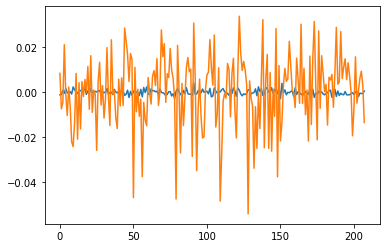

In [55]:
plt.plot(pred_oil)
plt.plot(y_val_oil)
plt.show()

0.015847659217878104


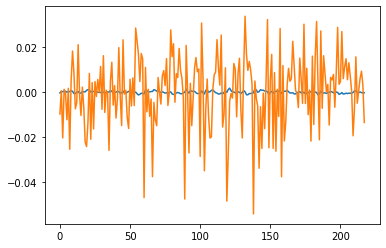

In [75]:
univariate_past_history = 2
univariate_future_target = 0

x_train_oil, y_train_oil = univariate_data(oil['oil'].values, 0, 1762,
                                           univariate_past_history,
                                           univariate_future_target)
x_val_oil, y_val_oil = univariate_data(oil['oil'].values, 1762, None,
                                       univariate_past_history,
                                       univariate_future_target)

lr.fit(x_train_oil,y_train_oil)
pred_oil=lr.predict(x_val_oil)
rmse=sqrt(mean_squared_error(y_val_oil,pred_oil))
print(rmse)

plt.plot(pred_oil)
plt.plot(y_val_oil)
plt.show()

0.015899095347767768


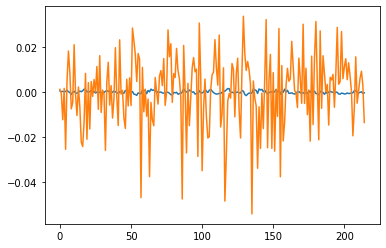

In [76]:
univariate_past_history = 5
univariate_future_target = 0

x_train_oil, y_train_oil = univariate_data(oil['oil'].values, 0, 1762,
                                           univariate_past_history,
                                           univariate_future_target)
x_val_oil, y_val_oil = univariate_data(oil['oil'].values, 1762, None,
                                       univariate_past_history,
                                       univariate_future_target)

lr.fit(x_train_oil,y_train_oil)
pred_oil=lr.predict(x_val_oil)
rmse=sqrt(mean_squared_error(y_val_oil,pred_oil))
print(rmse)

plt.plot(pred_oil)
plt.plot(y_val_oil)
plt.show()

0.016167059029669813


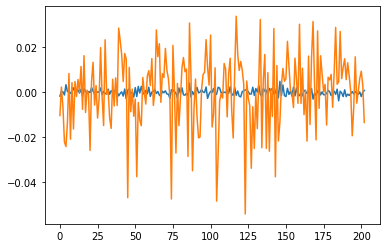

In [58]:
# The predictions are not so great
# Lets try with different window sizes

univariate_past_history = 17
univariate_future_target = 0

x_train_oil, y_train_oil = univariate_data(oil['oil'].values, 0, 1762,
                                           univariate_past_history,
                                           univariate_future_target)
x_val_oil, y_val_oil = univariate_data(oil['oil'].values, 1762, None,
                                       univariate_past_history,
                                       univariate_future_target)

lr.fit(x_train_oil,y_train_oil)
pred_oil=lr.predict(x_val_oil)
rmse=sqrt(mean_squared_error(y_val_oil,pred_oil))
print(rmse)

plt.plot(pred_oil)
plt.plot(y_val_oil)
plt.show()

0.017004996370948156


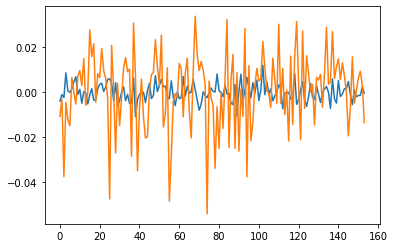

In [59]:
univariate_past_history = 66
univariate_future_target = 0

x_train_oil, y_train_oil = univariate_data(oil['oil'].values, 0, 1762,
                                           univariate_past_history,
                                           univariate_future_target)
x_val_oil, y_val_oil = univariate_data(oil['oil'].values, 1762, None,
                                       univariate_past_history,
                                       univariate_future_target)

lr.fit(x_train_oil,y_train_oil)
pred_oil=lr.predict(x_val_oil)
rmse=sqrt(mean_squared_error(y_val_oil,pred_oil))
print(rmse)

plt.plot(pred_oil)
plt.plot(y_val_oil)
plt.show()

0.017427984458002754


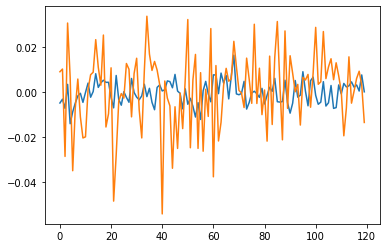

In [60]:
univariate_past_history = 100
univariate_future_target = 0

x_train_oil, y_train_oil = univariate_data(oil['oil'].values, 0, 1762,
                                           univariate_past_history,
                                           univariate_future_target)
x_val_oil, y_val_oil = univariate_data(oil['oil'].values, 1762, None,
                                       univariate_past_history,
                                       univariate_future_target)

lr.fit(x_train_oil,y_train_oil)
pred_oil=lr.predict(x_val_oil)
rmse=sqrt(mean_squared_error(y_val_oil,pred_oil))
print(rmse)

plt.plot(pred_oil)
plt.plot(y_val_oil)
plt.show()

0.016700539667596066


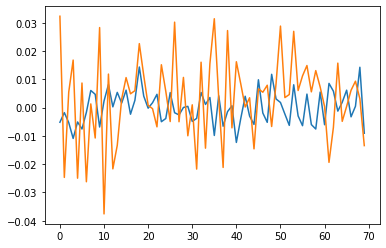

In [61]:
univariate_past_history = 150
univariate_future_target = 0

x_train_oil, y_train_oil = univariate_data(oil['oil'].values, 0, 1762,
                                           univariate_past_history,
                                           univariate_future_target)
x_val_oil, y_val_oil = univariate_data(oil['oil'].values, 1762, None,
                                       univariate_past_history,
                                       univariate_future_target)

lr.fit(x_train_oil,y_train_oil)
pred_oil=lr.predict(x_val_oil)
rmse=sqrt(mean_squared_error(y_val_oil,pred_oil))
print(rmse)

plt.plot(pred_oil)
plt.plot(y_val_oil)
plt.show()

0.015147553030348409


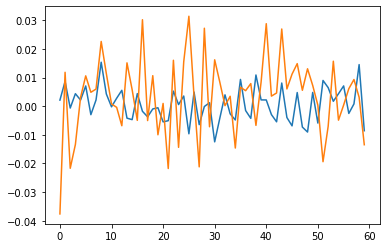

In [65]:
univariate_past_history = 160
univariate_future_target = 0

x_train_oil, y_train_oil = univariate_data(oil['oil'].values, 0, 1762,
                                           univariate_past_history,
                                           univariate_future_target)
x_val_oil, y_val_oil = univariate_data(oil['oil'].values, 1762, None,
                                       univariate_past_history,
                                       univariate_future_target)

lr.fit(x_train_oil,y_train_oil)
pred_oil=lr.predict(x_val_oil)
rmse=sqrt(mean_squared_error(y_val_oil,pred_oil))
print(rmse)

plt.plot(pred_oil)
plt.plot(y_val_oil)
plt.show()

In [66]:
# As we are increasing the window size, the model is getting better

In [67]:
# Lets try some complex models with window_siz=160

In [68]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
rf=RandomForestRegressor()
rf.fit(x_train_oil,y_train_oil)

RandomForestRegressor()

0.014263471785682328


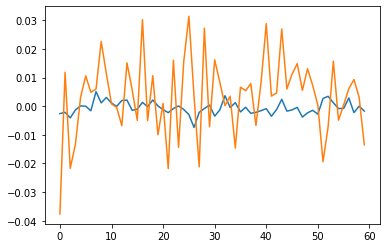

In [69]:
pred_oil=rf.predict(x_val_oil)
rmse=sqrt(mean_squared_error(y_val_oil,pred_oil))
print(rmse)

plt.plot(pred_oil)
plt.plot(y_val_oil)
plt.show()

0.017897811308369614


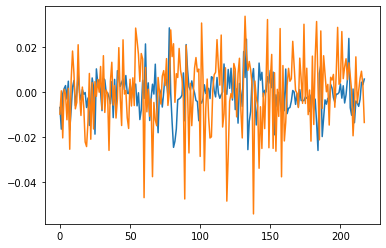

In [74]:
univariate_past_history = 2
univariate_future_target = 0

rf=RandomForestRegressor()
x_train_oil, y_train_oil = univariate_data(oil['oil'].values, 0, 1762,
                                           univariate_past_history,
                                           univariate_future_target)
x_val_oil, y_val_oil = univariate_data(oil['oil'].values, 1762, None,
                                       univariate_past_history,
                                       univariate_future_target)

rf.fit(x_train_oil,y_train_oil)
pred_oil=rf.predict(x_val_oil)
rmse=sqrt(mean_squared_error(y_val_oil,pred_oil))
print(rmse)

plt.plot(pred_oil)
plt.plot(y_val_oil)
plt.show()

0.01724017409155133


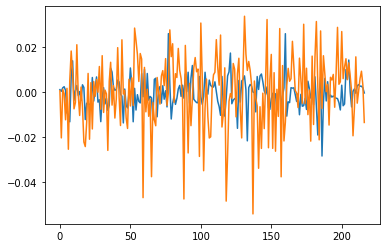

In [73]:
univariate_past_history = 3
univariate_future_target = 0

rf=RandomForestRegressor()
x_train_oil, y_train_oil = univariate_data(oil['oil'].values, 0, 1762,
                                           univariate_past_history,
                                           univariate_future_target)
x_val_oil, y_val_oil = univariate_data(oil['oil'].values, 1762, None,
                                       univariate_past_history,
                                       univariate_future_target)

rf.fit(x_train_oil,y_train_oil)
pred_oil=rf.predict(x_val_oil)
rmse=sqrt(mean_squared_error(y_val_oil,pred_oil))
print(rmse)

plt.plot(pred_oil)
plt.plot(y_val_oil)
plt.show()

0.016897419249562725


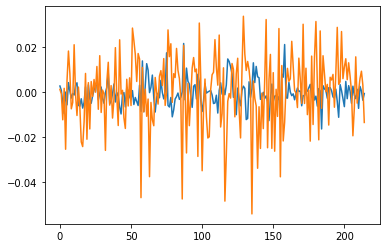

In [70]:
univariate_past_history = 5
univariate_future_target = 0

rf=RandomForestRegressor()
x_train_oil, y_train_oil = univariate_data(oil['oil'].values, 0, 1762,
                                           univariate_past_history,
                                           univariate_future_target)
x_val_oil, y_val_oil = univariate_data(oil['oil'].values, 1762, None,
                                       univariate_past_history,
                                       univariate_future_target)

rf.fit(x_train_oil,y_train_oil)
pred_oil=rf.predict(x_val_oil)
rmse=sqrt(mean_squared_error(y_val_oil,pred_oil))
print(rmse)

plt.plot(pred_oil)
plt.plot(y_val_oil)
plt.show()

0.01713238265192497


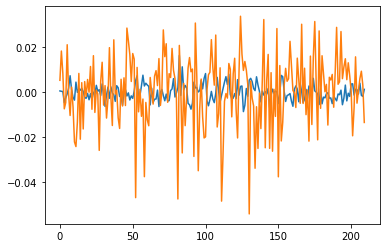

In [71]:
univariate_past_history = 10
univariate_future_target = 0

rf=RandomForestRegressor()
x_train_oil, y_train_oil = univariate_data(oil['oil'].values, 0, 1762,
                                           univariate_past_history,
                                           univariate_future_target)
x_val_oil, y_val_oil = univariate_data(oil['oil'].values, 1762, None,
                                       univariate_past_history,
                                       univariate_future_target)

rf.fit(x_train_oil,y_train_oil)
pred_oil=rf.predict(x_val_oil)
rmse=sqrt(mean_squared_error(y_val_oil,pred_oil))
print(rmse)

plt.plot(pred_oil)
plt.plot(y_val_oil)
plt.show()

0.01631579072656275


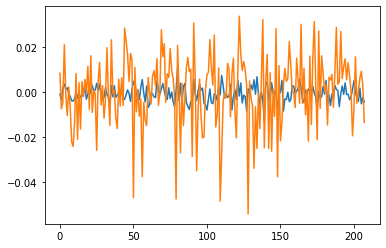

In [72]:
univariate_past_history = 12
univariate_future_target = 0

rf=RandomForestRegressor()
x_train_oil, y_train_oil = univariate_data(oil['oil'].values, 0, 1762,
                                           univariate_past_history,
                                           univariate_future_target)
x_val_oil, y_val_oil = univariate_data(oil['oil'].values, 1762, None,
                                       univariate_past_history,
                                       univariate_future_target)

rf.fit(x_train_oil,y_train_oil)
pred_oil=rf.predict(x_val_oil)
rmse=sqrt(mean_squared_error(y_val_oil,pred_oil))
print(rmse)

plt.plot(pred_oil)
plt.plot(y_val_oil)
plt.show()

In [77]:
# The predictions are very good with window size = 2

In [78]:
# Lets try Gradient boosting

0.01640300980085407


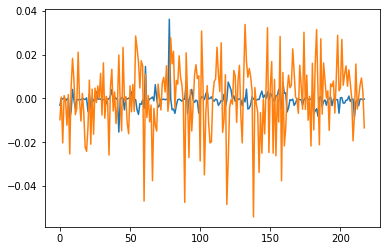

In [79]:
gb=GradientBoostingRegressor()

univariate_past_history = 2
univariate_future_target = 0

x_train_oil, y_train_oil = univariate_data(oil['oil'].values, 0, 1762,
                                           univariate_past_history,
                                           univariate_future_target)
x_val_oil, y_val_oil = univariate_data(oil['oil'].values, 1762, None,
                                       univariate_past_history,
                                       univariate_future_target)

gb.fit(x_train_oil,y_train_oil)
pred_oil=gb.predict(x_val_oil)
rmse=sqrt(mean_squared_error(y_val_oil,pred_oil))
print(rmse)

plt.plot(pred_oil)
plt.plot(y_val_oil)
plt.show()

0.016630719530349312


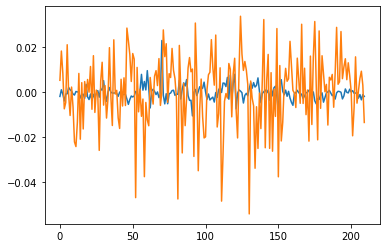

In [85]:
gb=GradientBoostingRegressor()

univariate_past_history = 10
univariate_future_target = 0

x_train_oil, y_train_oil = univariate_data(oil['oil'].values, 0, 1762,
                                           univariate_past_history,
                                           univariate_future_target)
x_val_oil, y_val_oil = univariate_data(oil['oil'].values, 1762, None,
                                       univariate_past_history,
                                       univariate_future_target)

gb.fit(x_train_oil,y_train_oil)
pred_oil=gb.predict(x_val_oil)
rmse=sqrt(mean_squared_error(y_val_oil,pred_oil))
print(rmse)

plt.plot(pred_oil)
plt.plot(y_val_oil)
plt.show()

In [86]:
# The results of gradient boosting are not that promising

In [87]:
# Lets try LSTM model
# Though we have very less data available, and there are high chances of over fitting

In [254]:
# We have tried LSTM in another ipynb file
# The model is not performing well

In [255]:
# Out of all the models till now, RF with window= 3 is performing well on the data

0.01710291516235426


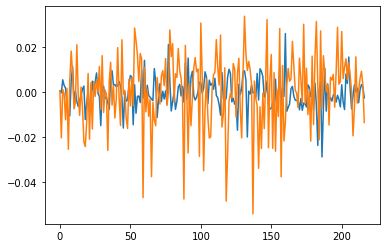

In [285]:
univariate_past_history = 3
univariate_future_target = 0

rf=RandomForestRegressor()
x_train_oil, y_train_oil = univariate_data(oil['oil'].values, 0, 1762,
                                           univariate_past_history,
                                           univariate_future_target)
x_val_oil, y_val_oil = univariate_data(oil['oil'].values, 1762, None,
                                       univariate_past_history,
                                       univariate_future_target)

rf.fit(x_train_oil,y_train_oil)
pred_oil=rf.predict(x_val_oil)
rmse=sqrt(mean_squared_error(y_val_oil,pred_oil))
print(rmse)

plt.plot(pred_oil)
plt.plot(y_val_oil)
plt.show()

In [256]:
# Now, let's use the stocks of other assests available as our features along with history

In [258]:
reg=data.copy()
reg.drop(['year'], axis=1, inplace=True)

In [260]:
reg.drop(pd.DatetimeIndex(['2009-12-31']), inplace=True)
reg.drop(pd.DatetimeIndex(['2017-03-07']), inplace=True)

In [261]:
x_train_oil.shape

(1759, 3)

0.016720868846767108


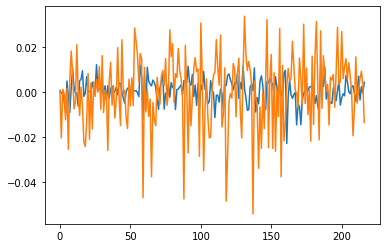

In [265]:
# lets make data frames
x_train_oil_df=pd.DataFrame(x_train_oil)
x_val_oil_df=pd.DataFrame(x_val_oil)

x_train_oil_df=pd.concat([x_train_oil_df, reg.drop(['oil'], axis=1).iloc[3:1762,:].reset_index(drop=True)], axis=1)
x_val_oil_df=pd.concat([x_val_oil_df, reg.drop(['oil'], axis=1).iloc[1765:,:].reset_index(drop=True)], axis=1)

rf=RandomForestRegressor()
rf.fit(x_train_oil_df, y_train_oil)
p=rf.predict(x_val_oil_df)
print(sqrt(mean_squared_error(p,y_val_oil)))

plt.plot(p)
plt.plot(y_val_oil)

In [266]:
# The error did not reduce significantly
# Therefore we'll use the model without other stocks as features

In [267]:
# Now, we'll generate future predictions using the model (till 2021)

253


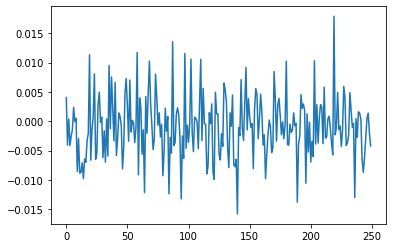

In [286]:
init_oil=oil['oil'].tail(3).values
init_oil=list(init_oil)

for i in range(250):
    p=float(rf.predict(np.array(init_oil[-3:]).reshape(1,-1)))
    init_oil.append(p)
    
print(len(init_oil))
pred_oil_2018=init_oil[3:]
plt.plot(pred_oil_2018)

250


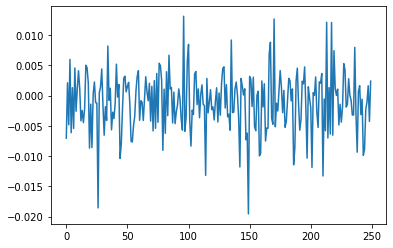

In [287]:
# Now, we'll define new init_2018_comp to predict values of 2019
pred_oil_2019=pred_oil_2018[-3:]
for i in range(250):
    p=float(rf.predict(np.array(pred_oil_2019[-3:]).reshape(1,-1)))
    pred_oil_2019.append(p)
    
pred_oil_2019=pred_oil_2019[3:]
print(len(pred_oil_2019))
plt.plot(pred_oil_2019)

250


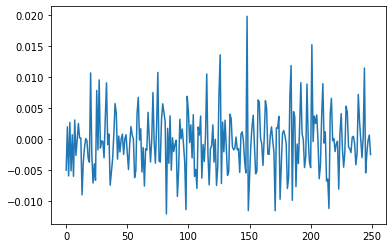

In [288]:
# now, for 2020
pred_oil_2020=pred_oil_2019[-3:]
for i in range(250):
    p=float(rf.predict(np.array(pred_oil_2020[-3:]).reshape(1,-1)))
    pred_oil_2020.append(p)
    
pred_oil_2020=pred_oil_2020[3:]
print(len(pred_oil_2020))
plt.plot(pred_oil_2020)

250


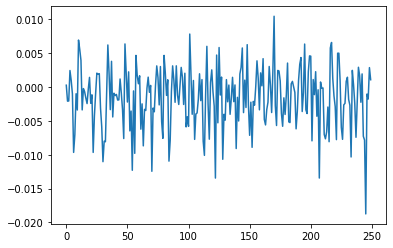

In [289]:
# now, for 2020
pred_oil_2021=pred_oil_2020[-3:]
for i in range(250):
    p=float(rf.predict(np.array(pred_oil_2021[-3:]).reshape(1,-1)))
    pred_oil_2021.append(p)
    
pred_oil_2021=pred_oil_2021[3:]
print(len(pred_oil_2021))
plt.plot(pred_oil_2021)

# Gold investmets

In [195]:
# Lets have the basic modelling for Gold data

In [94]:
gold=data.iloc[:,[1,4]]
gold.head()

,gold,year
date,,
2009-12-31,0.000150,2009
2010-01-02,0.007418,2010
2010-01-03,0.005188,2010
2010-01-04,0.007172,2010
2010-01-06,0.016770,2010


In [95]:
gold.shape

(1984, 2)

<AxesSubplot:xlabel='date'>

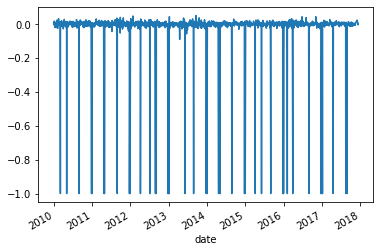

In [96]:
gold['gold'].plot()

<Figure size 1440x576 with 0 Axes>

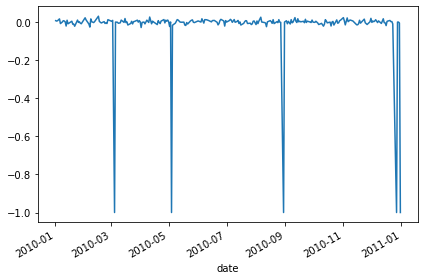

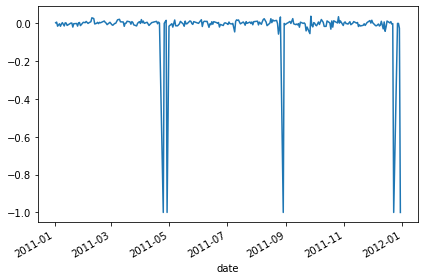

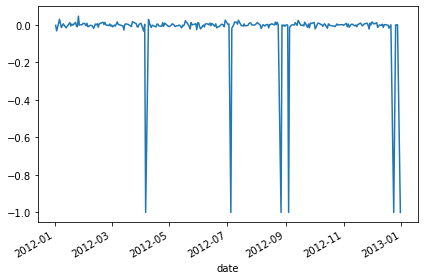

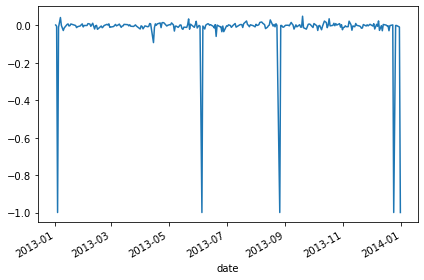

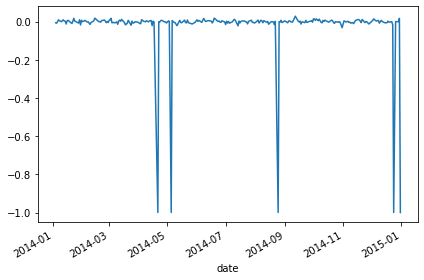

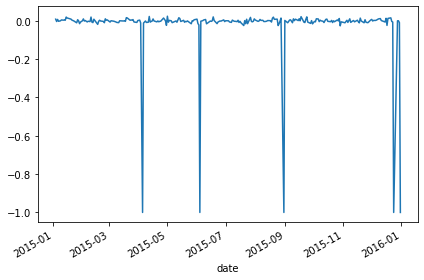

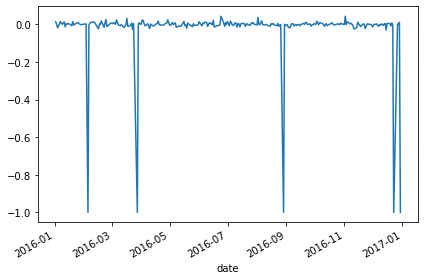

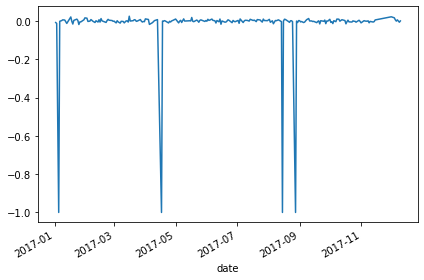

In [97]:
plt.figure(figsize=(20,8))
for i in range(2010,2018):
    
    plt.subplots()
    gold[gold['year']==i]['gold'].plot()
    plt.tight_layout()
    plt.show()

In [98]:
# Lets check the stationarity of data
adfuller_test(gold['gold'])

ADF Test Statistic : -18.28078578554933
p-value : 2.308597797492006e-30
#Lags Used : 3
Number of Observations Used : 1980
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data  is stationary


<Figure size 1440x360 with 0 Axes>

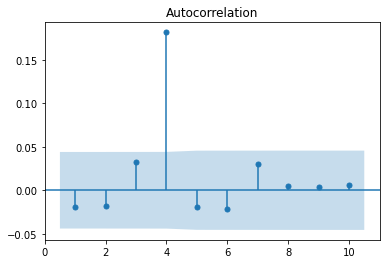

In [99]:
plt.figure(figsize=(20,5))
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(gold['gold'], zero=False, lags=10)
plt.show()

<Figure size 1440x360 with 0 Axes>

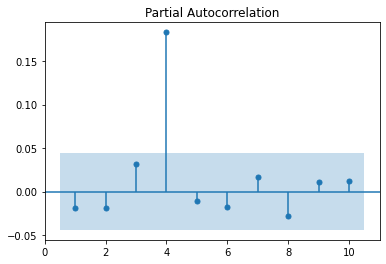

In [207]:
plt.figure(figsize=(20,5))
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(gold['gold'], zero=False, lags=10)
plt.show()

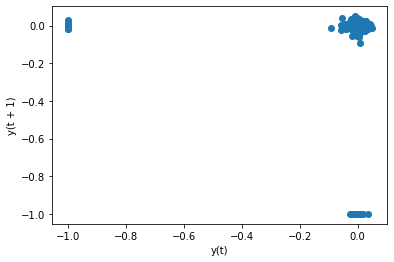

In [208]:
lag_plot(gold['gold'])
plt.show()

In [100]:
train=gold.loc[:'2016-12-30',:]
print(train.shape)
test=gold.loc['2017-01-02':,:]
print(test.shape)

(1763, 2)
(221, 2)


0.13421383541092471


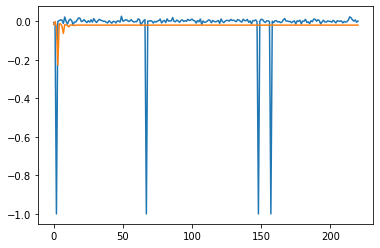

In [101]:
model = AutoReg(train['gold'], lags=4)
model_fit = model.fit()
# model_fit.summary()
predictions=model_fit.predict(start=len(train), end=len(train)+len(test)-1,dynamic=True)
rmse = sqrt(mean_squared_error(test['gold'].values, predictions.values))
print(rmse)
plt.plot(test['gold'].values)
plt.plot(predictions.values)

0.13421383541092471


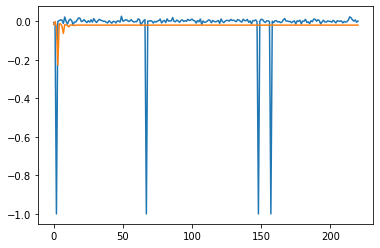

In [102]:
model = AutoReg(train['gold'], lags=4)
model_fit = model.fit()
# model_fit.summary()
predictions=model_fit.predict(start=len(train), end=len(train)+len(test)-1,dynamic=True)
rmse = sqrt(mean_squared_error(test['gold'].values, predictions.values))
print(rmse)
plt.plot(test['gold'].values)
plt.plot(predictions.values)

0.1336008469241238


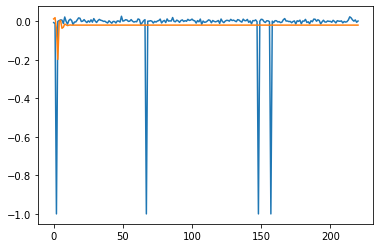

In [215]:
model=ARIMA(train['gold'],order=(4,0,4)) # this order is p d q(0 or 1) 
model_fit=model.fit()
predictions=model_fit.predict(start=len(train), end=len(train)+len(test)-1,dynamic=True)
rmse = sqrt(mean_squared_error(test['gold'].values, predictions.values))
print(rmse)
plt.plot(test['gold'].values)
plt.plot(predictions.values)

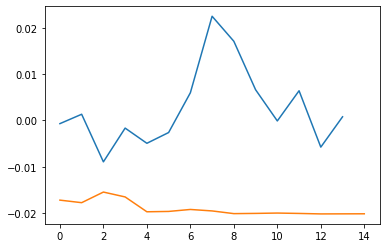

In [217]:
model = AutoReg(gold['gold'], lags=4)
model_fit = model.fit()
# model_fit.summary()
predictions=model_fit.predict(start=1970, end=1984,dynamic=True)
# rmse = sqrt(mean_squared_error(gold['gold'][1970:].values, predictions.values))
# print(rmse)
plt.plot(gold['gold'][1970:].values)
plt.plot(predictions.values)

In [104]:
# use the above function to create the datasets.
univariate_past_history = 4
univariate_future_target = 0

x_train_gold, y_train_gold = univariate_data(gold['gold'].values, 0, 1763,
                                           univariate_past_history,
                                           univariate_future_target)
x_val_gold, y_val_gold = univariate_data(gold['gold'].values, 1763, None,
                                       univariate_past_history,
                                       univariate_future_target)

print(x_train_gold.shape)
print(y_train_gold.shape)
print(x_val_gold.shape)
print(y_val_gold.shape)

(1759, 4)
(1759,)
(217, 4)
(217,)


0.13570022058179113


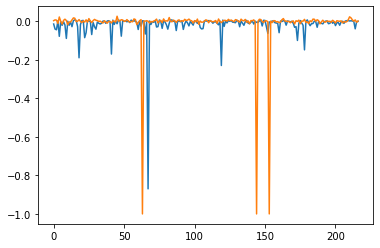

In [105]:
rf=RandomForestRegressor()

rf.fit(x_train_gold,y_train_gold)
pred_gold=rf.predict(x_val_gold)
rmse=sqrt(mean_squared_error(y_val_gold,pred_gold))
print(rmse)

plt.plot(pred_gold)
plt.plot(y_val_gold)
plt.show()

0.13067956598017924


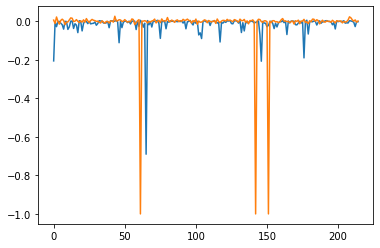

In [106]:
univariate_past_history = 6
univariate_future_target = 0

x_train_gold, y_train_gold = univariate_data(gold['gold'].values, 0, 1763,
                                           univariate_past_history,
                                           univariate_future_target)
x_val_gold, y_val_gold = univariate_data(gold['gold'].values, 1763, None,
                                       univariate_past_history,
                                       univariate_future_target)

rf=RandomForestRegressor()

rf.fit(x_train_gold,y_train_gold)
pred_gold=rf.predict(x_val_gold)
rmse=sqrt(mean_squared_error(y_val_gold,pred_gold))
print(rmse)

plt.plot(pred_gold)
plt.plot(y_val_gold)
plt.show()

0.12325863117702228


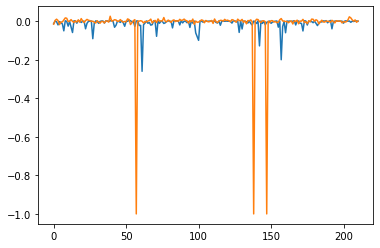

In [107]:
univariate_past_history = 10
univariate_future_target = 0

x_train_gold, y_train_gold = univariate_data(gold['gold'].values, 0, 1763,
                                           univariate_past_history,
                                           univariate_future_target)
x_val_gold, y_val_gold = univariate_data(gold['gold'].values, 1763, None,
                                       univariate_past_history,
                                       univariate_future_target)

rf=RandomForestRegressor()

rf.fit(x_train_gold,y_train_gold)
pred_gold=rf.predict(x_val_gold)
rmse=sqrt(mean_squared_error(y_val_gold,pred_gold))
print(rmse)

plt.plot(pred_gold)
plt.plot(y_val_gold)
plt.show()

0.12407810044917006


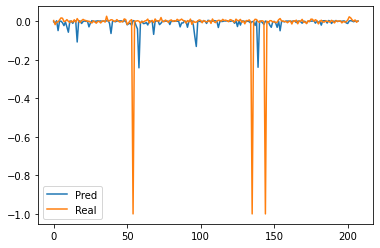

In [268]:
univariate_past_history = 13
univariate_future_target = 0

x_train_gold, y_train_gold = univariate_data(gold['gold'].values, 0, 1763,
                                           univariate_past_history,
                                           univariate_future_target)
x_val_gold, y_val_gold = univariate_data(gold['gold'].values, 1763, None,
                                       univariate_past_history,
                                       univariate_future_target)

rf=RandomForestRegressor()

rf.fit(x_train_gold,y_train_gold)
pred_gold=rf.predict(x_val_gold)
rmse=sqrt(mean_squared_error(y_val_gold,pred_gold))
print(rmse)

plt.plot(pred_gold, label='Pred')
plt.plot(y_val_gold, label='Real')
plt.legend()
plt.show()

0.1256811086806357


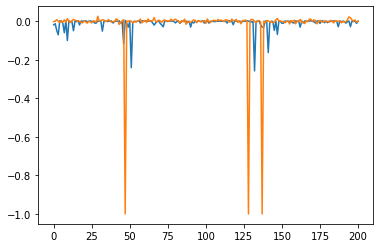

In [109]:
univariate_past_history = 20
univariate_future_target = 0

x_train_gold, y_train_gold = univariate_data(gold['gold'].values, 0, 1763,
                                           univariate_past_history,
                                           univariate_future_target)
x_val_gold, y_val_gold = univariate_data(gold['gold'].values, 1763, None,
                                       univariate_past_history,
                                       univariate_future_target)

rf=RandomForestRegressor()

rf.fit(x_train_gold,y_train_gold)
pred_gold=rf.predict(x_val_gold)
rmse=sqrt(mean_squared_error(y_val_gold,pred_gold))
print(rmse)

plt.plot(pred_gold)
plt.plot(y_val_gold)
plt.show()

0.12444523742439144


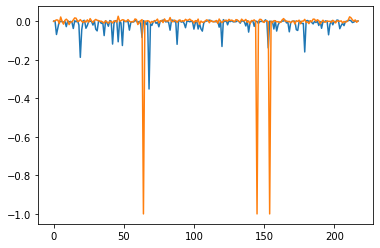

In [111]:
univariate_past_history = 3
univariate_future_target = 0

x_train_gold, y_train_gold = univariate_data(gold['gold'].values, 0, 1763,
                                           univariate_past_history,
                                           univariate_future_target)
x_val_gold, y_val_gold = univariate_data(gold['gold'].values, 1763, None,
                                       univariate_past_history,
                                       univariate_future_target)

rf=RandomForestRegressor()

rf.fit(x_train_gold,y_train_gold)
pred_gold=rf.predict(x_val_gold)
rmse=sqrt(mean_squared_error(y_val_gold,pred_gold))
print(rmse)

plt.plot(pred_gold)
plt.plot(y_val_gold)
plt.show()

0.13026872458506253


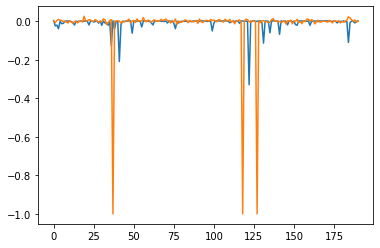

In [112]:
univariate_past_history = 30
univariate_future_target = 0

x_train_gold, y_train_gold = univariate_data(gold['gold'].values, 0, 1763,
                                           univariate_past_history,
                                           univariate_future_target)
x_val_gold, y_val_gold = univariate_data(gold['gold'].values, 1763, None,
                                       univariate_past_history,
                                       univariate_future_target)

rf=RandomForestRegressor()

rf.fit(x_train_gold,y_train_gold)
pred_gold=rf.predict(x_val_gold)
rmse=sqrt(mean_squared_error(y_val_gold,pred_gold))
print(rmse)

plt.plot(pred_gold)
plt.plot(y_val_gold)
plt.show()

0.12094479583806125


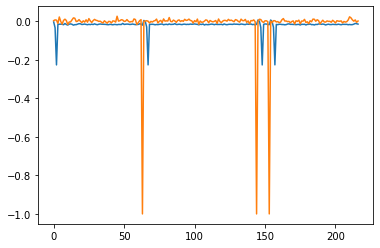

In [114]:
univariate_past_history = 4
univariate_future_target = 0

x_train_gold, y_train_gold = univariate_data(gold['gold'].values, 0, 1763,
                                           univariate_past_history,
                                           univariate_future_target)
x_val_gold, y_val_gold = univariate_data(gold['gold'].values, 1763, None,
                                       univariate_past_history,
                                       univariate_future_target)


lr.fit(x_train_gold,y_train_gold)
pred_gold=lr.predict(x_val_gold)
rmse=sqrt(mean_squared_error(y_val_gold,pred_gold))
print(rmse)

plt.plot(pred_gold)
plt.plot(y_val_gold)
plt.show()

0.136744829723899


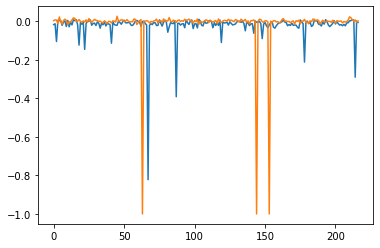

In [115]:
univariate_past_history = 4
univariate_future_target = 0

x_train_gold, y_train_gold = univariate_data(gold['gold'].values, 0, 1763,
                                           univariate_past_history,
                                           univariate_future_target)
x_val_gold, y_val_gold = univariate_data(gold['gold'].values, 1763, None,
                                       univariate_past_history,
                                       univariate_future_target)


gb.fit(x_train_gold,y_train_gold)
pred_gold=gb.predict(x_val_gold)
rmse=sqrt(mean_squared_error(y_val_gold,pred_gold))
print(rmse)

plt.plot(pred_gold)
plt.plot(y_val_gold)
plt.show()

In [117]:
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor()

0.13655069138716067


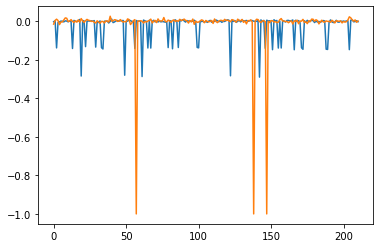

In [119]:
univariate_past_history = 10
univariate_future_target = 0

x_train_gold, y_train_gold = univariate_data(gold['gold'].values, 0, 1763,
                                           univariate_past_history,
                                           univariate_future_target)
x_val_gold, y_val_gold = univariate_data(gold['gold'].values, 1763, None,
                                       univariate_past_history,
                                       univariate_future_target)
knn=KNeighborsRegressor(n_neighbors=7)

knn.fit(x_train_gold,y_train_gold)
pred_gold=knn.predict(x_val_gold)
rmse=sqrt(mean_squared_error(y_val_gold,pred_gold))
print(rmse)

plt.plot(pred_gold)
plt.plot(y_val_gold)
plt.show()

0.1266923518246643


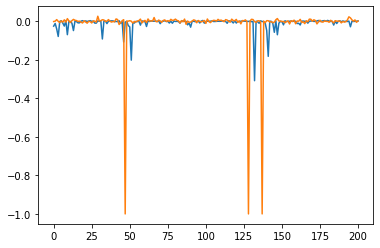

In [269]:
# Here, random forest is working well

univariate_past_history = 20
univariate_future_target = 0

x_train_gold, y_train_gold = univariate_data(gold['gold'].values, 0, 1763,
                                           univariate_past_history,
                                           univariate_future_target)
x_val_gold, y_val_gold = univariate_data(gold['gold'].values, 1763, None,
                                       univariate_past_history,
                                       univariate_future_target)

rf=RandomForestRegressor()

rf.fit(x_train_gold,y_train_gold)
pred_gold=rf.predict(x_val_gold)
rmse=sqrt(mean_squared_error(y_val_gold,pred_gold))
print(rmse)

plt.plot(pred_gold)
plt.plot(y_val_gold)
plt.show()

0.12706242053845992


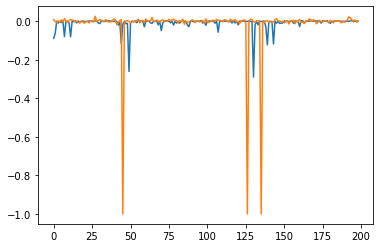

In [270]:
univariate_past_history = 22
univariate_future_target = 0

x_train_gold, y_train_gold = univariate_data(gold['gold'].values, 0, 1763,
                                           univariate_past_history,
                                           univariate_future_target)
x_val_gold, y_val_gold = univariate_data(gold['gold'].values, 1763, None,
                                       univariate_past_history,
                                       univariate_future_target)

rf=RandomForestRegressor()

rf.fit(x_train_gold,y_train_gold)
pred_gold=rf.predict(x_val_gold)
rmse=sqrt(mean_squared_error(y_val_gold,pred_gold))
print(rmse)

plt.plot(pred_gold)
plt.plot(y_val_gold)
plt.show()

0.12872844531788527


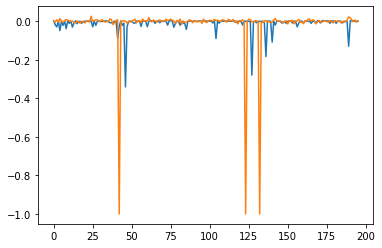

In [271]:
univariate_past_history = 25
univariate_future_target = 0

x_train_gold, y_train_gold = univariate_data(gold['gold'].values, 0, 1763,
                                           univariate_past_history,
                                           univariate_future_target)
x_val_gold, y_val_gold = univariate_data(gold['gold'].values, 1763, None,
                                       univariate_past_history,
                                       univariate_future_target)

rf=RandomForestRegressor()

rf.fit(x_train_gold,y_train_gold)
pred_gold=rf.predict(x_val_gold)
rmse=sqrt(mean_squared_error(y_val_gold,pred_gold))
print(rmse)

plt.plot(pred_gold)
plt.plot(y_val_gold)
plt.show()

0.1289531709661154


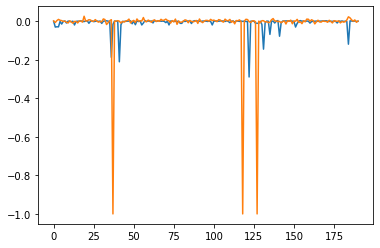

In [277]:
univariate_past_history = 30
univariate_future_target = 0

x_train_gold, y_train_gold = univariate_data(gold['gold'].values, 0, 1763,
                                           univariate_past_history,
                                           univariate_future_target)
x_val_gold, y_val_gold = univariate_data(gold['gold'].values, 1763, None,
                                       univariate_past_history,
                                       univariate_future_target)

rf=RandomForestRegressor()

rf.fit(x_train_gold,y_train_gold)
pred_gold=rf.predict(x_val_gold)
rmse=sqrt(mean_squared_error(y_val_gold,pred_gold))
print(rmse)

plt.plot(pred_gold)
plt.plot(y_val_gold)
plt.show()

In [278]:
# The results are not so good but window size=30 is okay 

In [276]:
# Now, lets use other stock values as features

0.12878601428592165


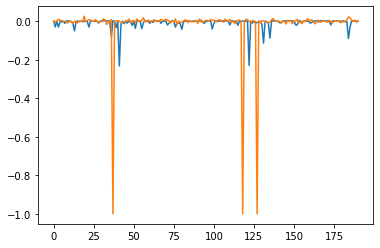

In [279]:
# lets make data frames
reg=data.copy()
reg.drop(['year'], axis=1, inplace=True)

x_train_gold_df=pd.DataFrame(x_train_gold)
x_val_gold_df=pd.DataFrame(x_val_gold)

x_train_gold_df=pd.concat([x_train_gold_df, reg.drop(['gold'], axis=1).iloc[30:1763,:].reset_index(drop=True)], axis=1)
x_val_gold_df=pd.concat([x_val_gold_df, reg.drop(['gold'], axis=1).iloc[1793:,:].reset_index(drop=True)], axis=1)

rf=RandomForestRegressor()
rf.fit(x_train_gold_df, y_train_gold)
p=rf.predict(x_val_gold_df)
print(sqrt(mean_squared_error(p,y_val_gold)))

plt.plot(p)
plt.plot(y_val_gold)

In [280]:
# The error did not reduce

(1763, 4)
(221, 4)
0.13898864668828345


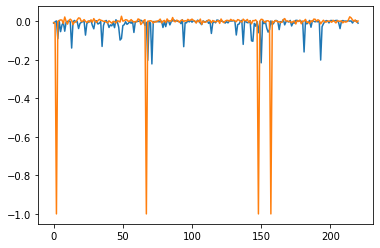

In [281]:
# Lets take other stocks only as features (without history)

# lets split the data
train=reg.loc[:'2016-12-30',:]
print(train.shape)
test=reg.loc['2017-01-02':,:]
print(test.shape)

rf=RandomForestRegressor()
rf.fit(train.drop(['gold'],axis=1), train['gold'])

p=rf.predict(test.drop(['gold'],axis=1))
print(sqrt(mean_squared_error(p,test['gold'])))

plt.plot(p)
plt.plot(test['gold'].values)

In [282]:
# Random forest on history only was performing well

0.1298407656186028


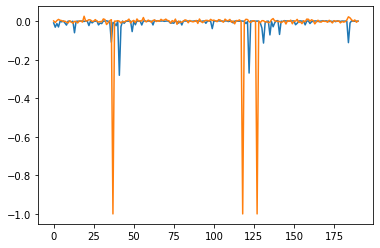

In [298]:
univariate_past_history = 30
univariate_future_target = 0

x_train_gold, y_train_gold = univariate_data(gold['gold'].values, 0, 1763,
                                           univariate_past_history,
                                           univariate_future_target)
x_val_gold, y_val_gold = univariate_data(gold['gold'].values, 1763, None,
                                       univariate_past_history,
                                       univariate_future_target)

rf=RandomForestRegressor()

rf.fit(x_train_gold,y_train_gold)
pred_gold=rf.predict(x_val_gold)
rmse=sqrt(mean_squared_error(y_val_gold,pred_gold))
print(rmse)

plt.plot(pred_gold)
plt.plot(y_val_gold)
plt.show()

In [291]:
# Now, we'll generate predictions till year 2021

280


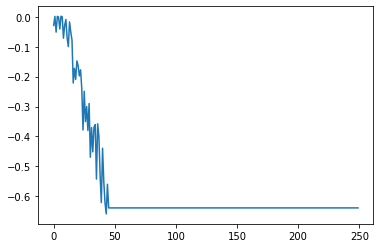

In [299]:
init_gold=gold['gold'].tail(30).values
init_gold=list(init_gold)

for i in range(250):
    p=float(rf.predict(np.array(init_gold[-30:]).reshape(1,-1)))
    init_gold.append(p)
    
print(len(init_gold))
pred_gold_2018=init_gold[30:]
plt.plot(pred_gold_2018)

250


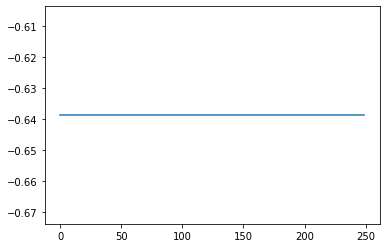

In [300]:
# Now, we'll define new init_2018_comp to predict values of 2019
pred_gold_2019=pred_gold_2018[-30:]
for i in range(250):
    p=float(rf.predict(np.array(pred_gold_2019[-30:]).reshape(1,-1)))
    pred_gold_2019.append(p)
    
pred_gold_2019=pred_gold_2019[30:]
print(len(pred_gold_2019))
plt.plot(pred_gold_2019)

In [301]:
# The predictions being generated are constant

250


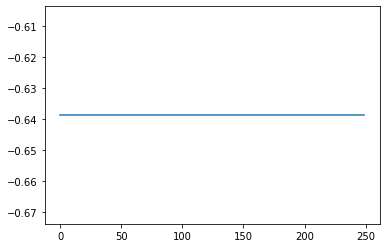

In [303]:
pred_gold_2020=pred_gold_2019[-30:]
for i in range(250):
    p=float(rf.predict(np.array(pred_gold_2020[-30:]).reshape(1,-1)))
    pred_gold_2020.append(p)
    
pred_gold_2020=pred_gold_2020[30:]
print(len(pred_gold_2020))
plt.plot(pred_gold_2020)

250


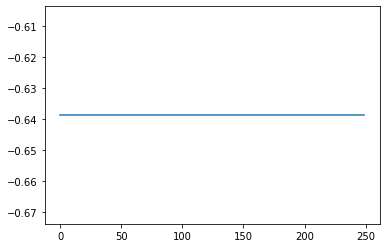

In [304]:
pred_gold_2021=pred_gold_2020[-30:]
for i in range(250):
    p=float(rf.predict(np.array(pred_gold_2021[-30:]).reshape(1,-1)))
    pred_gold_2021.append(p)
    
pred_gold_2021=pred_gold_2021[30:]
print(len(pred_gold_2021))
plt.plot(pred_gold_2021)

# Cmpy Stocks

In [120]:
comp=data.iloc[:,[2,4]]
comp.head()

,comp,year
date,,
2009-12-31,0.017354,2009
2010-01-02,0.013902,2010
2010-01-03,0.021357,2010
2010-01-04,0.004128,2010
2010-01-06,0.015377,2010


<AxesSubplot:xlabel='date'>

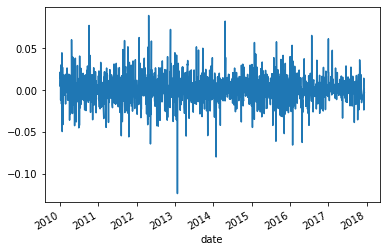

In [122]:
comp['comp'].plot()

<Figure size 1440x576 with 0 Axes>

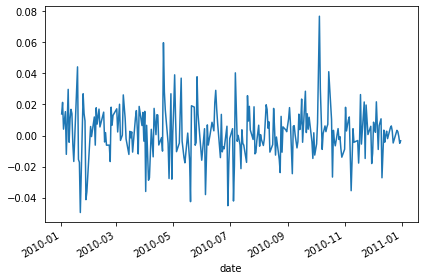

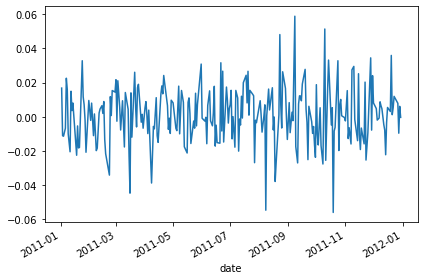

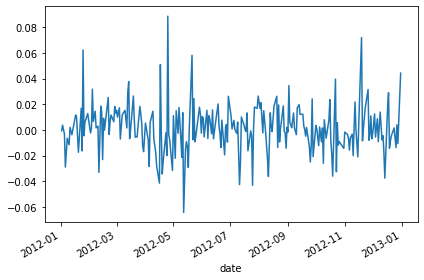

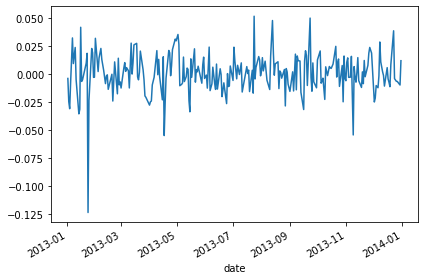

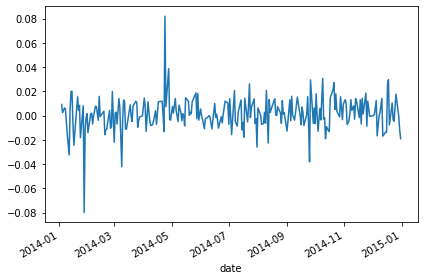

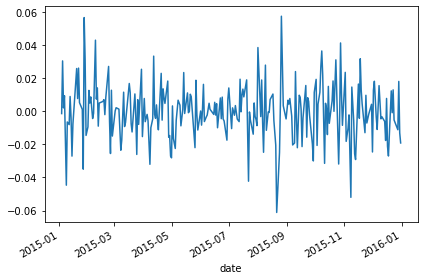

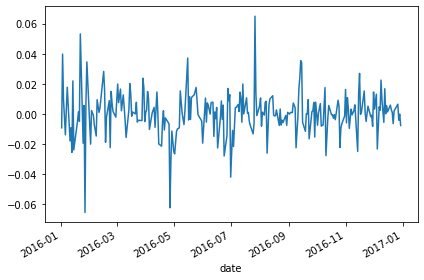

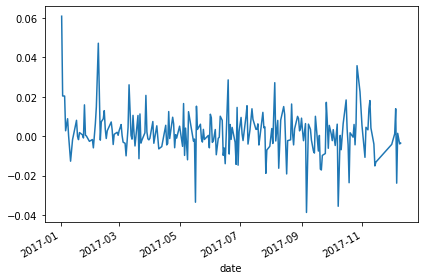

In [123]:
plt.figure(figsize=(20,8))
for i in range(2010,2018):
    
    plt.subplots()
    comp[comp['year']==i]['comp'].plot()
    plt.tight_layout()
    plt.show()

In [124]:
# Lets check the stationarity of data
adfuller_test(comp['comp'])

ADF Test Statistic : -15.191309570811372
p-value : 6.005097502012962e-28
#Lags Used : 9
Number of Observations Used : 1974
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data  is stationary


<Figure size 1440x360 with 0 Axes>

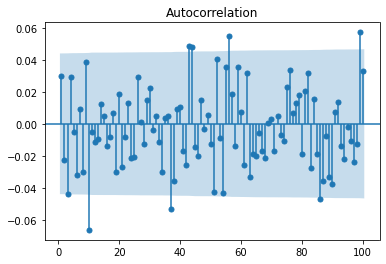

In [127]:
plt.figure(figsize=(20,5))
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(comp['comp'], zero=False, lags=100)
plt.show()

<Figure size 1440x360 with 0 Axes>

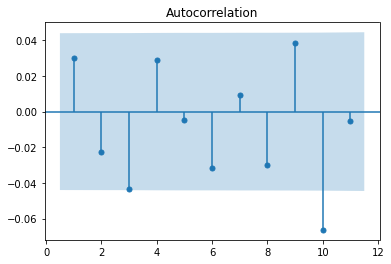

In [128]:
plt.figure(figsize=(20,5))
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(comp['comp'], zero=False, lags=11)
plt.show()

<Figure size 1440x360 with 0 Axes>

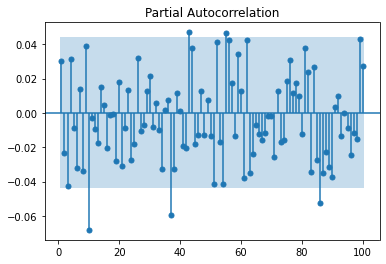

In [130]:
plt.figure(figsize=(20,5))
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(comp['comp'], zero=False, lags=100)
plt.show()

<Figure size 1440x360 with 0 Axes>

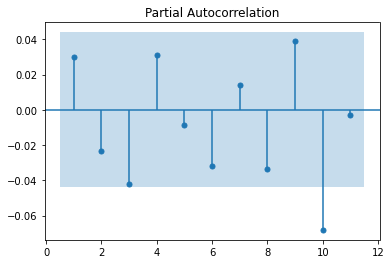

In [131]:
plt.figure(figsize=(20,5))
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(comp['comp'], zero=False, lags=11)
plt.show()

In [133]:
train=comp.loc[:'2016-12-30',:]
print(train.shape)
test=comp.loc['2017-01-02':,:]
print(test.shape)

(1763, 2)
(221, 2)


0.011265166387101509


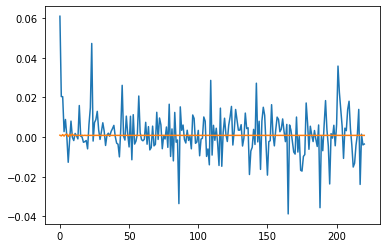

In [134]:
model = AutoReg(train['comp'], lags=10)
model_fit = model.fit()
# model_fit.summary()
predictions=model_fit.predict(start=len(train), end=len(train)+len(test)-1,dynamic=True)
rmse = sqrt(mean_squared_error(test['comp'].values, predictions.values))
print(rmse)
plt.plot(test['comp'].values)
plt.plot(predictions.values)

0.011259701872350132


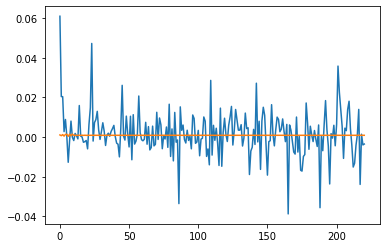

In [136]:
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(train['comp'],order=(10,0,10)) # this order is p d q(0 or 1) 
model_fit=model.fit()
predictions=model_fit.predict(start=len(train), end=len(train)+len(test)-1,dynamic=True)
rmse = sqrt(mean_squared_error(test['comp'].values, predictions.values))
print(rmse)
plt.plot(test['comp'].values)
plt.plot(predictions.values)

0.010684679966426554


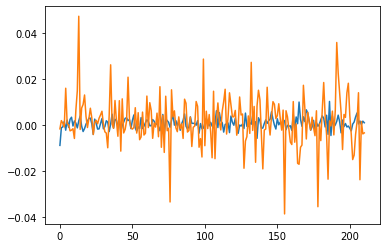

In [138]:
univariate_past_history = 10
univariate_future_target = 0

x_train_comp, y_train_comp = univariate_data(comp['comp'].values, 0, 1763,
                                           univariate_past_history,
                                           univariate_future_target)
x_val_comp, y_val_comp = univariate_data(comp['comp'].values, 1763, None,
                                       univariate_past_history,
                                       univariate_future_target)

rf=RandomForestRegressor()

rf.fit(x_train_comp,y_train_comp)
pred_comp=rf.predict(x_val_comp)
rmse=sqrt(mean_squared_error(y_val_comp,pred_comp))
print(rmse)

plt.plot(pred_comp)
plt.plot(y_val_comp)
plt.show()

0.012267791880873406


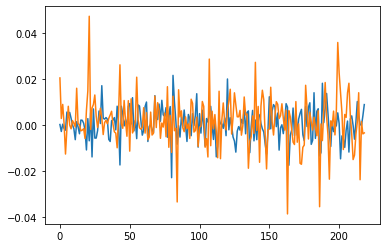

In [139]:
univariate_past_history = 2
univariate_future_target = 0

x_train_comp, y_train_comp = univariate_data(comp['comp'].values, 0, 1763,
                                           univariate_past_history,
                                           univariate_future_target)
x_val_comp, y_val_comp = univariate_data(comp['comp'].values, 1763, None,
                                       univariate_past_history,
                                       univariate_future_target)

rf=RandomForestRegressor()

rf.fit(x_train_comp,y_train_comp)
pred_comp=rf.predict(x_val_comp)
rmse=sqrt(mean_squared_error(y_val_comp,pred_comp))
print(rmse)

plt.plot(pred_comp)
plt.plot(y_val_comp)
plt.show()

0.011688003864687739


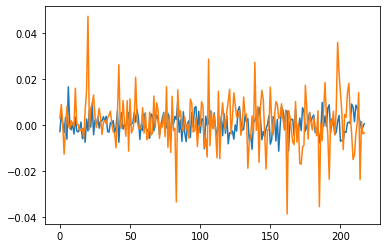

In [140]:
univariate_past_history = 3
univariate_future_target = 0

x_train_comp, y_train_comp = univariate_data(comp['comp'].values, 0, 1763,
                                           univariate_past_history,
                                           univariate_future_target)
x_val_comp, y_val_comp = univariate_data(comp['comp'].values, 1763, None,
                                       univariate_past_history,
                                       univariate_future_target)

rf=RandomForestRegressor()

rf.fit(x_train_comp,y_train_comp)
pred_comp=rf.predict(x_val_comp)
rmse=sqrt(mean_squared_error(y_val_comp,pred_comp))
print(rmse)

plt.plot(pred_comp)
plt.plot(y_val_comp)
plt.show()

0.010496898599630426


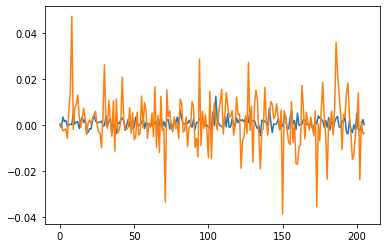

In [142]:
univariate_past_history = 15
univariate_future_target = 0

x_train_comp, y_train_comp = univariate_data(comp['comp'].values, 0, 1763,
                                           univariate_past_history,
                                           univariate_future_target)
x_val_comp, y_val_comp = univariate_data(comp['comp'].values, 1763, None,
                                       univariate_past_history,
                                       univariate_future_target)

rf=RandomForestRegressor()

rf.fit(x_train_comp,y_train_comp)
pred_comp=rf.predict(x_val_comp)
rmse=sqrt(mean_squared_error(y_val_comp,pred_comp))
print(rmse)

plt.plot(pred_comp)
plt.plot(y_val_comp)
plt.show()

0.010770254661819368


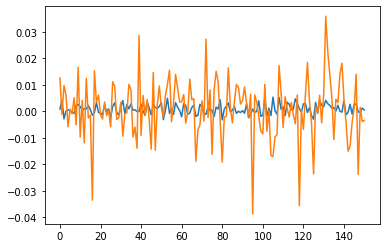

In [148]:
univariate_past_history = 70
univariate_future_target = 0

x_train_comp, y_train_comp = univariate_data(comp['comp'].values, 0, 1763,
                                           univariate_past_history,
                                           univariate_future_target)
x_val_comp, y_val_comp = univariate_data(comp['comp'].values, 1763, None,
                                       univariate_past_history,
                                       univariate_future_target)

lr=LinearRegression()

lr.fit(x_train_comp,y_train_comp)
pred_comp=lr.predict(x_val_comp)
rmse=sqrt(mean_squared_error(y_val_comp,pred_comp))
print(rmse)

plt.plot(pred_comp)
plt.plot(y_val_comp)
plt.show()

0.010617723010605859


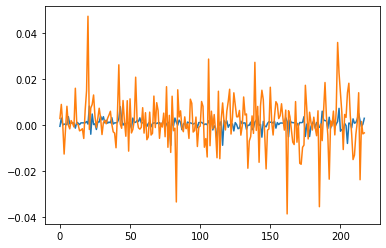

In [150]:
univariate_past_history = 3
univariate_future_target = 0

x_train_comp, y_train_comp = univariate_data(comp['comp'].values, 0, 1763,
                                           univariate_past_history,
                                           univariate_future_target)
x_val_comp, y_val_comp = univariate_data(comp['comp'].values, 1763, None,0
                                       univariate_past_history,
                                       univariate_future_target)

gb=GradientBoostingRegressor()

gb.fit(x_train_comp,y_train_comp)
pred_comp=gb.predict(x_val_comp)
rmse=sqrt(mean_squared_error(y_val_comp,pred_comp))
print(rmse)

plt.plot(pred_comp)
plt.plot(y_val_comp)
plt.show()

In [151]:
# Now, we want to predict the values in 2020 and 2021
# we need to create a function for that.

0.012013487027720801


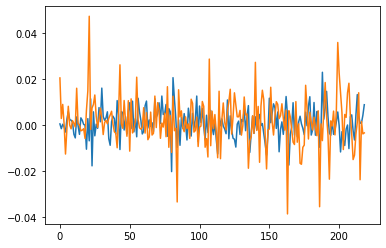

In [152]:
# Now acccording to the best model, our history size=2

univariate_past_history = 2
univariate_future_target = 0

x_train_comp, y_train_comp = univariate_data(comp['comp'].values, 0, 1763,
                                           univariate_past_history,
                                           univariate_future_target)
x_val_comp, y_val_comp = univariate_data(comp['comp'].values, 1763, None,
                                       univariate_past_history,
                                       univariate_future_target)

rf=RandomForestRegressor()

rf.fit(x_train_comp,y_train_comp)
pred_comp=rf.predict(x_val_comp)
rmse=sqrt(mean_squared_error(y_val_comp,pred_comp))
print(rmse)

plt.plot(pred_comp)
plt.plot(y_val_comp)
plt.show()

In [153]:
# We want previous 2 values to generate new predictions

# We have data till 2017 and we want to predict the prices in 2020 and 2021

# Each year, we have around 250 observations, therefore, we'll predict 1000 future observations
# (250 each for 2018, 2019, 2020 and 2021)

# Then, in order to see which stock should we invest in, we'll plot the values of 2020 and 2021 for each
# and compare them

In [154]:
# Now, lets create a function to predict

In [155]:
comp['comp'].tail()

date
2017-12-05    0.013966
2017-12-06   -0.023896
2017-12-07    0.001443
2017-12-09   -0.003963
2017-12-10   -0.003513
Name: comp, dtype: float64

In [157]:
comp['year'].value_counts()

2016    252
2015    252
2014    252
2013    252
2011    252
2010    252
2012    250
2017    221
2009      1
Name: year, dtype: int64

In [158]:
# we'll start with the last 2 values of 2017 and predict
# That will be considered the first prediction of 2018
# We'll proceed further likewise

In [186]:
init_comp=comp['comp'].tail(2).values
init_comp=list(init_comp)

In [187]:
for i in range(250):
    p=float(rf.predict(np.array(init_comp[-2:]).reshape(1,-1)))
    init_comp.append(p)

In [188]:
len(init_comp)

252

In [189]:
pred_comp_2018=init_comp[2:]

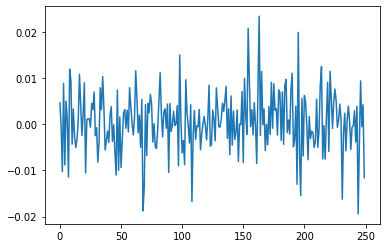

In [191]:
plt.plot(pred_comp_2018)

250


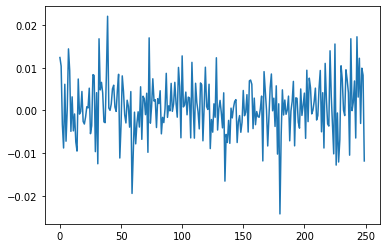

In [194]:
# Now, we'll define new init_2018_comp to predict values of 2019
pred_comp_2019=pred_comp_2018[-2:]
for i in range(250):
    p=float(rf.predict(np.array(pred_comp_2019[-2:]).reshape(1,-1)))
    pred_comp_2019.append(p)
    
pred_comp_2019=pred_comp_2019[2:]
print(len(pred_comp_2019))
plt.plot(pred_comp_2019)

250


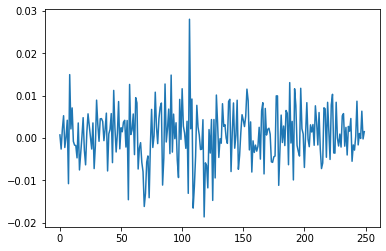

In [195]:
# now, for 2020
pred_comp_2020=pred_comp_2019[-2:]
for i in range(250):
    p=float(rf.predict(np.array(pred_comp_2020[-2:]).reshape(1,-1)))
    pred_comp_2020.append(p)
    
pred_comp_2020=pred_comp_2020[2:]
print(len(pred_comp_2020))
plt.plot(pred_comp_2020)

250


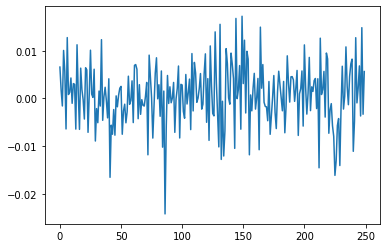

In [196]:
# now, for 2021
pred_comp_2021=pred_comp_2020[-2:]
for i in range(250):
    p=float(rf.predict(np.array(pred_comp_2021[-2:]).reshape(1,-1)))
    pred_comp_2021.append(p)
    
pred_comp_2021=pred_comp_2021[2:]
print(len(pred_comp_2021))
plt.plot(pred_comp_2021)

In [197]:
# Now, lets train a regression model for the given problem
# We have data of stocks of gold, oil, comp and other for the same day
# There might be some relation between the performance of all these stocks
# So, we'll use gold, oil and other as features to predict comp as target column

In [198]:
reg=data.copy()

In [199]:
reg.head()

,oil,gold,comp,other,year
date,,,,,
2009-12-31,0.025417,0.000150,0.017354,0.006848,2009
2010-01-02,0.021414,0.007418,0.013902,-0.052149,2010
2010-01-03,-0.012669,0.005188,0.021357,0.051858,2010
2010-01-04,0.012942,0.007172,0.004128,-0.029167,2010
2010-01-06,-0.017568,0.016770,0.015377,-0.017695,2010


In [200]:
# lets drop year column
reg.drop(['year'], axis=1, inplace=True)

In [201]:
x = reg.drop(['comp'], axis=1)
y = reg['comp']

In [208]:
# lets split the data
train=reg.loc[:'2016-12-30',:]
print(train.shape)
test=reg.loc['2017-01-02':,:]
print(test.shape)

(1763, 4)
(221, 4)


In [209]:
rf=RandomForestRegressor()
rf.fit(train.drop(['comp'],axis=1), train['comp'])

RandomForestRegressor()

In [211]:
p=rf.predict(test.drop(['comp'],axis=1))

In [212]:
print(sqrt(mean_squared_error(p,test['comp'])))

0.010986583803516537


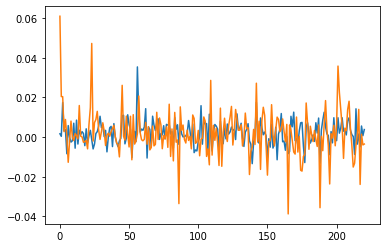

In [218]:
plt.plot(p)
plt.plot(test['comp'].values)

In [ ]:
lr=LinearRegression()

In [219]:
# The error is somehow reducing

In [220]:
# Now, lets try the mix of two models
# We'll use the other stocks as features as well as history of the same stock

In [221]:
x_train_comp.shape

(1761, 2)

In [222]:
comp.shape

(1984, 2)

In [223]:
x_val_comp.shape

(219, 2)

In [ ]:
# the total data points available in x_train_comp are 1761
# the index of these points are [2,1762]

# similarly, the total data points available in x_val_comp are 219
# the index of these points are [1765,1983]

In [231]:
# lets make data frames
x_train_comp_df=pd.DataFrame(x_train_comp)
x_val_comp_df=pd.DataFrame(x_val_comp)

In [241]:
x_train_comp_df=pd.concat([x_train_comp_df, reg.drop(['comp'], axis=1).iloc[2:1763,:].reset_index(drop=True)], axis=1)

In [242]:
x_train_comp_df

,0,1,oil,gold,other
0,0.017354,0.013902,-0.012669,0.005188,0.051858
1,0.013902,0.021357,0.012942,0.007172,-0.029167
2,0.021357,0.004128,-0.017568,0.016770,-0.017695
3,0.004128,0.015377,-0.034925,-0.008039,0.015559
4,0.015377,-0.012126,0.028361,0.000401,0.061363
...,...,...,...,...,...
1756,0.000941,-0.006578,0.000577,-1.000000,-0.007503
1757,-0.006578,0.001978,0.015574,0.000000,0.014213
1758,0.001978,0.006351,0.022529,0.000000,0.000946
1759,0.006351,-0.004264,-0.003888,0.009959,-0.009040


In [243]:
x_val_comp_df=pd.concat([x_val_comp_df, reg.drop(['comp'], axis=1).iloc[1765:,:].reset_index(drop=True)], axis=1)

In [245]:
x_val_comp_df.head()

,0,1,oil,gold,other
0,0.060981,0.020439,-0.009734,-1.000000,0.025125
1,0.020439,0.020397,0.000621,-0.001066,0.001337
2,0.020397,0.002749,-0.020315,0.002682,0.008514
3,0.002749,0.008875,0.001270,0.006594,-0.002396
4,0.008875,0.000305,-0.000736,0.005432,-0.001448


In [246]:
# Now, lets apply rf over this data
rf=RandomForestRegressor()
rf.fit(x_train_comp_df, y_train_comp)

RandomForestRegressor()

In [247]:
p=rf.predict(x_val_comp_df)

In [248]:
print(sqrt(mean_squared_error(p,y_val_comp)))

0.009750633842526715


In [249]:
# The error reduced

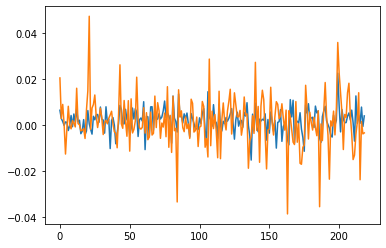

In [250]:
plt.plot(p)
plt.plot(y_val_comp)

In [251]:
# But with this technique, we can't predict the values in the future because we need 
# the stock prices for gold, oil and other in future to do so

0.011007399946098756


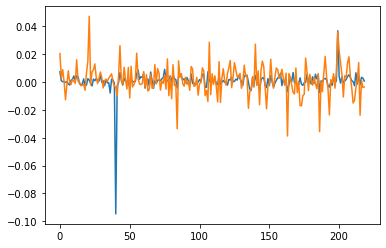

In [252]:
# applying linear regression on the same data
lr=LinearRegression()
lr.fit(x_train_comp_df, y_train_comp)
p=lr.predict(x_val_comp_df)
print(sqrt(mean_squared_error(p,y_val_comp)))

plt.plot(p)
plt.plot(y_val_comp)

In [253]:
# Random forest was performing well

# Final report

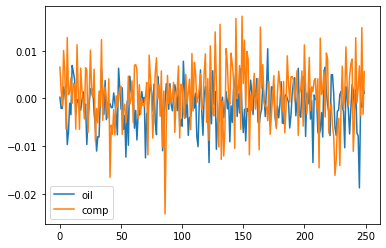

In [306]:
plt.plot(pred_oil_2021, label='oil')
plt.plot(pred_comp_2021, label='comp')
plt.legend()
plt.show()